/var/folders/v4/vr3wk_q55dbbq68v6wdr2mrh0000gn/T/ipykernel_87197/1642328037.py:26: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=df_long, x='Genus', y='Abundance', hue='group',


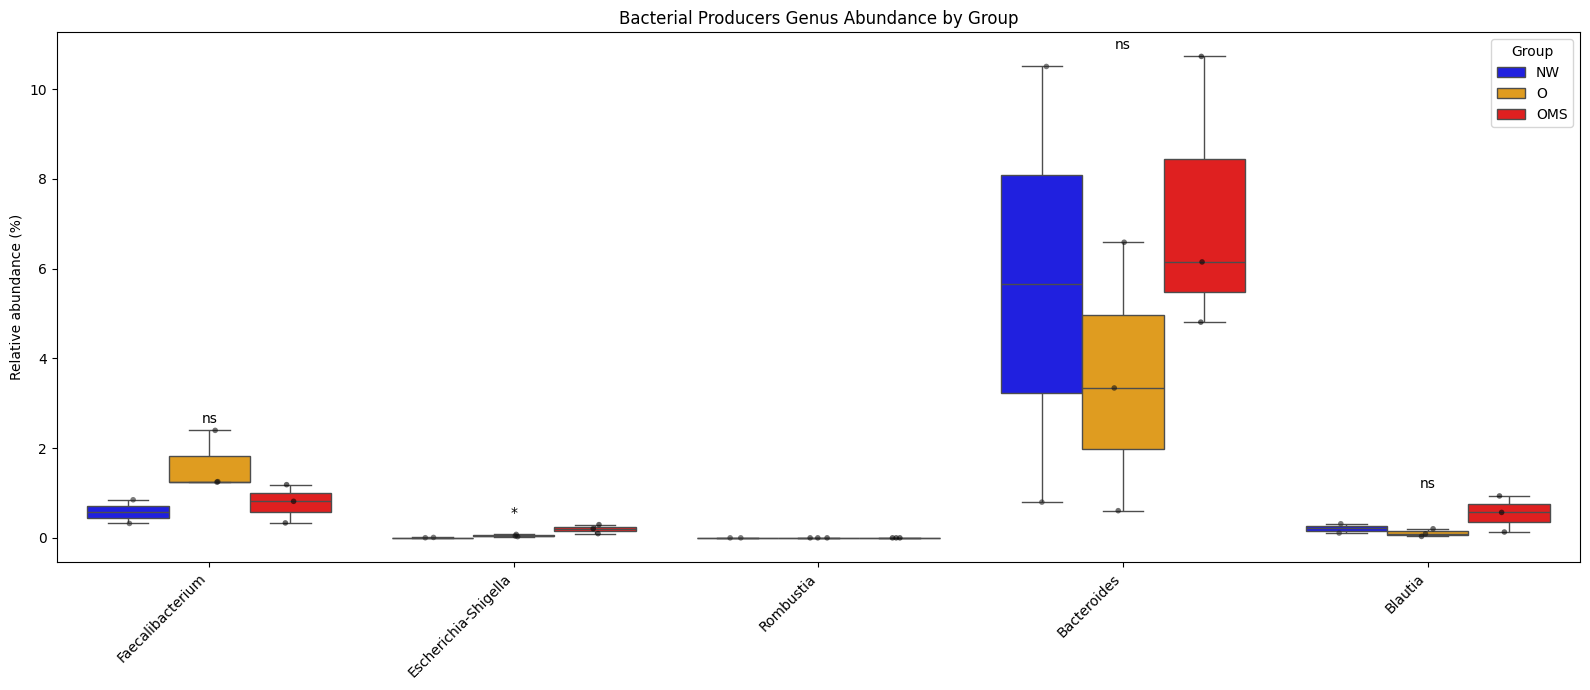

/var/folders/v4/vr3wk_q55dbbq68v6wdr2mrh0000gn/T/ipykernel_87197/1642328037.py:90: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=df_long, x='Genus', y='Abundance', hue='group',


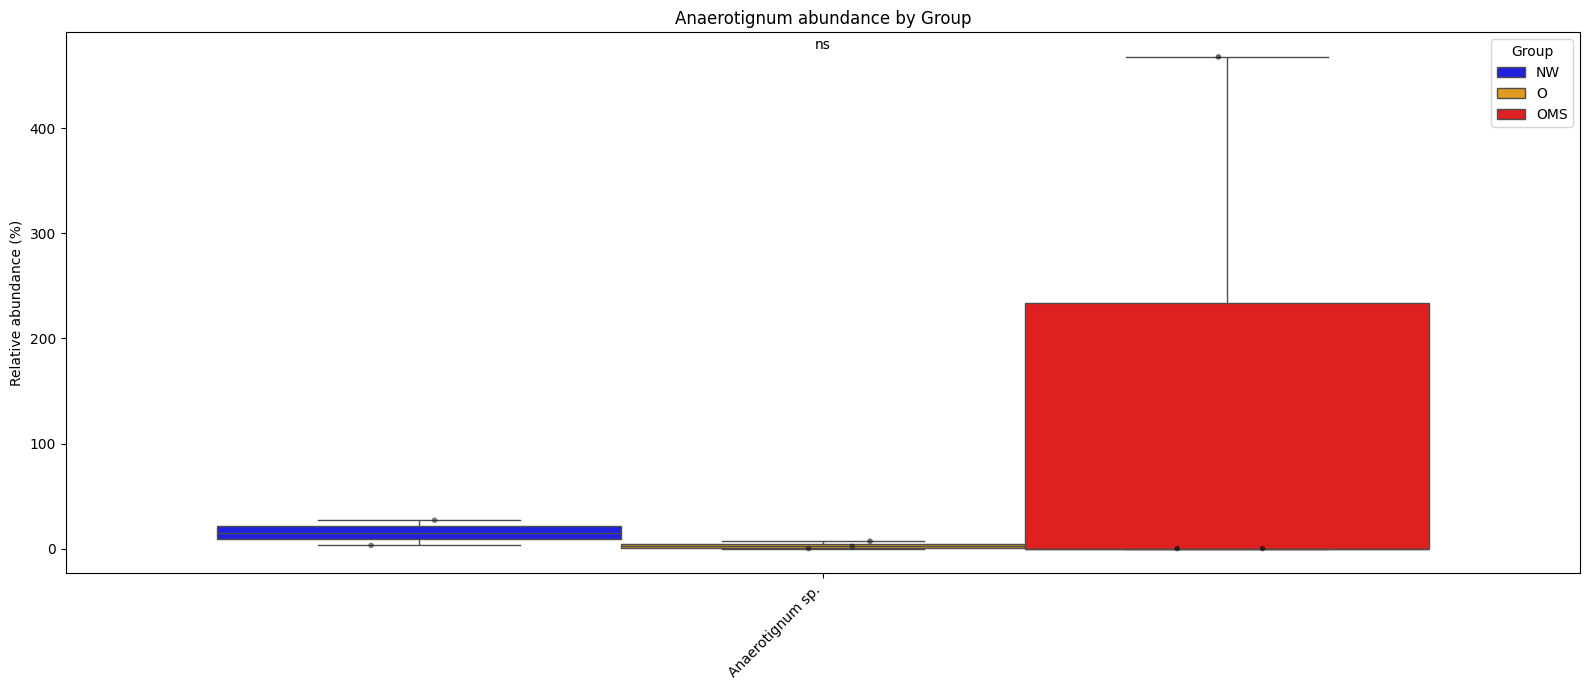

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

# Load the TSV data file
file_path = "./bacterial_producers_genus_abundance_t.tsv"
df = pd.read_csv(file_path, sep='\t')

# Select only genus columns (excluding 'index' and 'group')
genus_cols = [col for col in df.columns if col not in ['index', 'group']]

# Melt the dataframe to long format
df_long = df.melt(id_vars='group', value_vars=genus_cols, 
                  var_name='Genus', value_name='Abundance')

# Define custom palette
custom_palette = {'NW': 'blue', 'O': 'orange', 'OMS': 'red'}

# Prepare figure
plt.figure(figsize=(16, 7))
ax = sns.boxplot(data=df_long, x='Genus', y='Abundance', hue='group', palette=custom_palette)

# Add individual data points on top
sns.stripplot(data=df_long, x='Genus', y='Abundance', hue='group',
              color="black", dodge=True, size=4, jitter=True, alpha=0.6, ax=ax)

# Remove duplicate legends
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3], title="Group")

# Perform Kruskal-Wallis test per genus and annotate
y_offset = df_long['Abundance'].max() * 0.01  # vertical space for text
for i, genus in enumerate(genus_cols):
    subset = df_long[df_long['Genus'] == genus]
    groups = [group["Abundance"].dropna().values for name, group in subset.groupby("group")]
    
    # Skip if not enough groups or if all values are identical
    if len(groups) >= 2 and all(len(g) > 0 for g in groups):
        all_values = np.concatenate(groups)
        if len(np.unique(all_values)) > 1:
            try:
                stat, pval = kruskal(*groups)
                x = i
                y = subset['Abundance'].max() + y_offset
                # Determine significance level
                if pval < 0.001:
                    significance = '***'
                elif pval < 0.01:
                    significance = '**'
                elif pval < 0.05:
                    significance = '*'
                else:
                    significance = 'ns'
                ax.text(x, y, significance, ha='center', va='bottom', fontsize=10)
            except ValueError:
                pass  # If Kruskal still fails, skip

plt.title('Bacterial Producers Genus Abundance by Group')
plt.ylabel('Relative abundance (%)')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("./bacterial_producers_genus_abundance_by_group.png", dpi=300)
plt.savefig("./bacterial_producers_genus_abundance_by_group.svg", dpi=300)
plt.show()


#### Load the TSV data file for Anaerotignum
# Load the TSV data file
file_path = "./amp3020_anaerotignum_abundance_t.tsv"
df = pd.read_csv(file_path, sep='\t')

# Select only genus columns (excluding 'index' and 'group')
genus_cols = [col for col in df.columns if col not in ['index', 'group']]

# Melt the dataframe to long format
df_long = df.melt(id_vars='group', value_vars=genus_cols, 
                  var_name='Genus', value_name='Abundance')

# Define custom palette
custom_palette = {'NW': 'blue', 'O': 'orange', 'OMS': 'red'}

# Prepare figure
plt.figure(figsize=(16, 7))
ax = sns.boxplot(data=df_long, x='Genus', y='Abundance', hue='group', palette=custom_palette)

# Add individual data points on top
sns.stripplot(data=df_long, x='Genus', y='Abundance', hue='group',
              color="black", dodge=True, size=4, jitter=True, alpha=0.6, ax=ax)

# Remove duplicate legends
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3], title="Group")

# Perform Kruskal-Wallis test per genus and annotate
y_offset = df_long['Abundance'].max() * 0.01  # vertical space for text
for i, genus in enumerate(genus_cols):
    subset = df_long[df_long['Genus'] == genus]
    groups = [group["Abundance"].dropna().values for name, group in subset.groupby("group")]
    
    # Skip if not enough groups or if all values are identical
    if len(groups) >= 2 and all(len(g) > 0 for g in groups):
        all_values = np.concatenate(groups)
        if len(np.unique(all_values)) > 1:
            try:
                stat, pval = kruskal(*groups)
                x = i
                y = subset['Abundance'].max() + y_offset
                # Determine significance level
                if pval < 0.001:
                    significance = '***'
                elif pval < 0.01:
                    significance = '**'
                elif pval < 0.05:
                    significance = '*'
                else:
                    significance = 'ns'
                ax.text(x, y, significance, ha='center', va='bottom', fontsize=10)
            except ValueError:
                pass  # If Kruskal still fails, skip

plt.title('Anaerotignum abundance by Group')
plt.ylabel('Relative abundance (%)')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("./amp3020_anaerotignum_abundance_abundance_by_group.png", dpi=300)
plt.savefig("./amp3020_anaerotignum_abundance_abundance_by_group.svg", dpi=300)
plt.show()
